In [35]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [36]:
df_app_train = pd.read_csv('application_train.csv')
df_app_test = pd.read_csv('application_test.csv')

In [37]:
#print(df_app_test.TARGET.value_counts())
print(df_app_train.TARGET.value_counts())

0    282686
1     24825
Name: TARGET, dtype: int64


In [44]:
def func_info(data):

    list_column =[]
    list_type   =[]
    list_len    =[] 
    list_null   =[]
    list_persen_null =[]
    list_value_count = []
    list_len_unique=[]

    for column in data.columns:

        column_name = column
        column_type = data[column].dtype
        column_len  = data[column].notnull().sum()
        column_null = data[column].isnull().sum()
        column_persen = round(column_null/data.shape[0] *100,2)

        list_column.append(column_name)
        list_type.append(column_type)
        list_len.append(column_len)
        list_null.append(column_null)
        list_persen_null.append(column_persen)

    df_info = pd.DataFrame({'column' : list_column,
                          'dtype'  : list_type,
                          'length' : list_len,
                          'null_count': list_null,
                          'null_percents': list_persen_null})
    
    for index,row in df_info.iterrows() :
        if row['dtype'] == 'object':
            value_count = data[row.column].value_counts().reset_index()
            value_count = value_count.values.tolist()
            len_unique = len(value_count)
        else:
            value_count = None
            len_unique = None

        list_value_count.append(value_count)
        list_len_unique.append(len_unique)

    df_info['value_count'] = list_value_count
    df_info['len_unique'] = list_len_unique
    
    return df_info

In [48]:
info_train = func_info(df_app_train)
info_test = func_info(df_app_test)

info_train_sort = info_train[(info_train.null_count>0) & (info_train['dtype']=='object')].sort_values(by = 'null_count',ascending=False)
info_test_sort  = info_test[(info_test.null_count>0)].sort_values(by='null_count',ascending=False)

print('---------------------info_train--------------')
display(info_train_sort)
print('---------------------info_test--------------')
display(info_test_sort)

---------------------info_train--------------


,column,dtype,length,null_count,null_percents,value_count,len_unique
86,FONDKAPREMONT_MODE,object,97216,210295,68.39,"[[reg oper account, 73830], [reg oper spec acc...",4.0
89,WALLSMATERIAL_MODE,object,151170,156341,50.84,"[[Panel, 66040], [Stone, brick, 64815], [Block...",7.0
87,HOUSETYPE_MODE,object,153214,154297,50.18,"[[block of flats, 150503], [specific housing, ...",3.0
90,EMERGENCYSTATE_MODE,object,161756,145755,47.40,"[[No, 159428], [Yes, 2328]]",2.0
28,OCCUPATION_TYPE,object,211120,96391,31.35,"[[Laborers, 55186], [Sales staff, 32102], [Cor...",18.0
11,NAME_TYPE_SUITE,object,306219,1292,0.42,"[[Unaccompanied, 248526], [Family, 40149], [Sp...",7.0


---------------------info_test--------------


,column,dtype,length,null_count,null_percents,value_count,len_unique
61,COMMONAREA_MODE,float64,15249,33495,68.72,None,NaN
75,COMMONAREA_MEDI,float64,15249,33495,68.72,None,NaN
47,COMMONAREA_AVG,float64,15249,33495,68.72,None,NaN
83,NONLIVINGAPARTMENTS_MEDI,float64,15397,33347,68.41,None,NaN
55,NONLIVINGAPARTMENTS_AVG,float64,15397,33347,68.41,None,NaN
...,...,...,...,...,...,...,...
92,OBS_60_CNT_SOCIAL_CIRCLE,float64,48715,29,0.06,None,NaN
91,DEF_30_CNT_SOCIAL_CIRCLE,float64,48715,29,0.06,None,NaN
90,OBS_30_CNT_SOCIAL_CIRCLE,float64,48715,29,0.06,None,NaN
8,AMT_ANNUITY,float64,48720,24,0.05,None,NaN


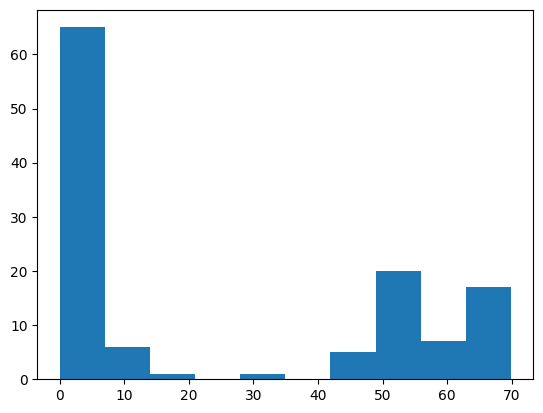

65
122


In [64]:
plt.hist(info_train.null_percents)
plt.show()

print(len(info_train[info_train['null_percents'] < 5]))
print(len(info_train))


In [65]:
column_important = info_train.column.tolist()
column_important

for column in column_important:
    if 

SyntaxError: invalid syntax (3127431697.py, line 5)